In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
drainage_df = pd.read_excel('chd_drainage_hourly.xlsx', sheet_name = 'drainage_capacity')

In [21]:
drainage_df.head()

,area_id,area_name,Year,Month,Month_Name,Design_Capacity_mm_per_hr,Monthly_capacity_mm,Estimated_area_rain_mm,Hourly_Peak_mm,Risk_Flag
0,1,Sector 17,2018,1,Jan,20,14880,2.0,NaN,OK
1,1,Sector 17,2018,2,Feb,20,13440,2.2,NaN,OK
2,1,Sector 17,2018,3,Mar,20,14880,3.4,NaN,OK
3,1,Sector 17,2018,4,Apr,20,14400,9.1,NaN,OK
4,1,Sector 17,2018,5,May,20,14880,17.2,NaN,OK


In [22]:
drainage_df.isnull()

,area_id,area_name,Year,Month,Month_Name,Design_Capacity_mm_per_hr,Monthly_capacity_mm,Estimated_area_rain_mm,Hourly_Peak_mm,Risk_Flag
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
475,False,False,False,False,False,False,False,False,False,False
476,False,False,False,False,False,False,False,False,False,False
477,False,False,False,False,False,False,False,False,True,False
478,False,False,False,False,False,False,False,False,True,False


In [23]:
drainage_df.dropna(inplace = True)

In [24]:
drainage_df

,area_id,area_name,Year,Month,Month_Name,Design_Capacity_mm_per_hr,Monthly_capacity_mm,Estimated_area_rain_mm,Hourly_Peak_mm,Risk_Flag
90,1,Sector 17,2025,7,Jul,20,14880,33.3,55.0,AT_RISK
91,1,Sector 17,2025,8,Aug,20,14880,55.5,60.0,AT_RISK
92,1,Sector 17,2025,9,Sep,20,14400,19.7,50.0,AT_RISK
186,2,Sector 22,2025,7,Jul,20,14880,37.0,55.0,AT_RISK
187,2,Sector 22,2025,8,Aug,20,14880,61.7,60.0,AT_RISK
188,2,Sector 22,2025,9,Sep,20,14400,21.9,50.0,AT_RISK
282,3,Daria Village,2025,7,Jul,15,11160,22.2,55.0,AT_RISK
283,3,Daria Village,2025,8,Aug,15,11160,37.0,60.0,AT_RISK
284,3,Daria Village,2025,9,Sep,15,10800,13.2,50.0,AT_RISK
378,4,Industrial Area,2025,7,Jul,25,18600,40.7,55.0,AT_RISK


C:\Users\HP\AppData\Local\Temp\ipykernel_21040\2074796964.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


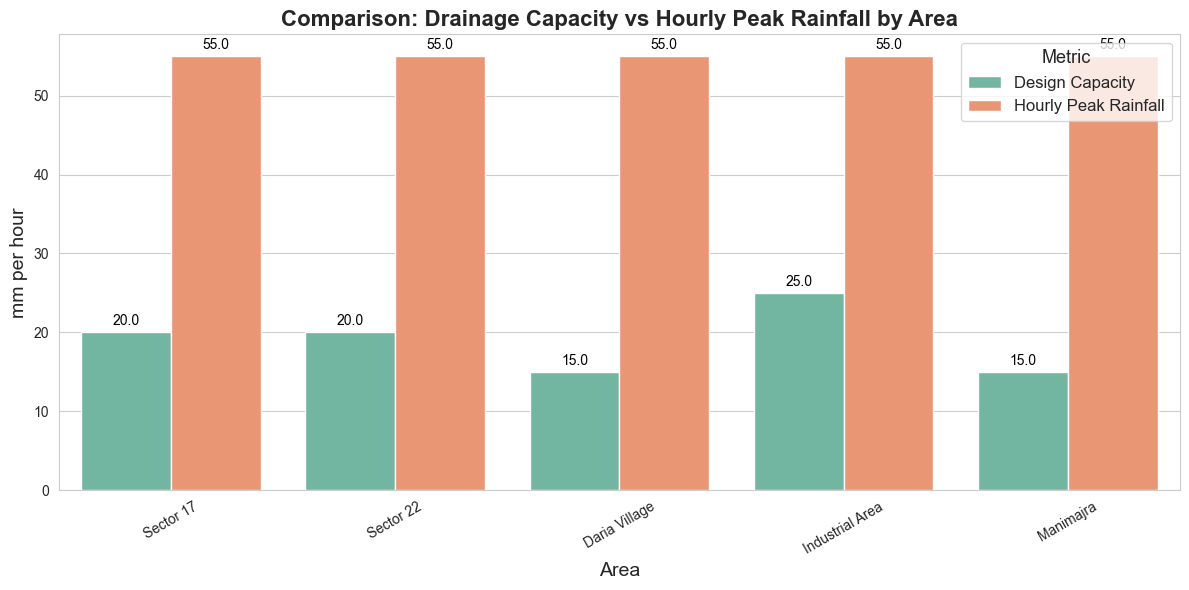

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: your data in wide format
# drainage_df has columns: area_name, Month_Name, Design_Capacity_mm_per_hr, Hourly_Peak_mm

# Convert to long format
df_long = drainage_df.melt(
    id_vars=["area_name", "Month_Name"],
    value_vars=["Design_Capacity_mm_per_hr", "Hourly_Peak_mm"],
    var_name="Metric",
    value_name="mm_per_hr"
)

# Rename metrics to nicer labels
df_long["Metric"] = df_long["Metric"].map({
    "Design_Capacity_mm_per_hr": "Design Capacity",
    "Hourly_Peak_mm": "Hourly Peak Rainfall"
})

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df_long,
    x="area_name",
    y="mm_per_hr",
    hue="Metric",
    palette="Set2",
    ci=None,
    dodge=True
)

# Titles and axes labels
ax.set_title("Comparison: Drainage Capacity vs Hourly Peak Rainfall by Area", fontsize=16, weight="bold")
ax.set_xlabel("Area", fontsize=14)
ax.set_ylabel("mm per hour", fontsize=14)
ax.tick_params(axis="x", rotation=30)

# Legend
ax.legend(title="Metric", fontsize=12, title_fontsize=13, loc="upper right")

# Annotate only the bar patches that correspond to your data
# We'll inspect each bar patch, compute its center + height, and annotate
for bar in ax.patches:
    height = bar.get_height()
    if height is None or pd.isna(height):
        continue
    # Only annotate if it's a “data” bar (height > 0 or above a threshold)
    if height > 0.1:  
        ax.annotate(
            f"{height:.1f}",
            (bar.get_x() + bar.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            xytext=(0, 3),  # vertical offset in points
            textcoords="offset points"
        )

plt.tight_layout()
plt.show()






C:\Users\HP\AppData\Local\Temp\ipykernel_21040\2445318004.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_21040\2445318004.py:31: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_21040\2445318004.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_21040\2445318004.py:50: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.catplot(


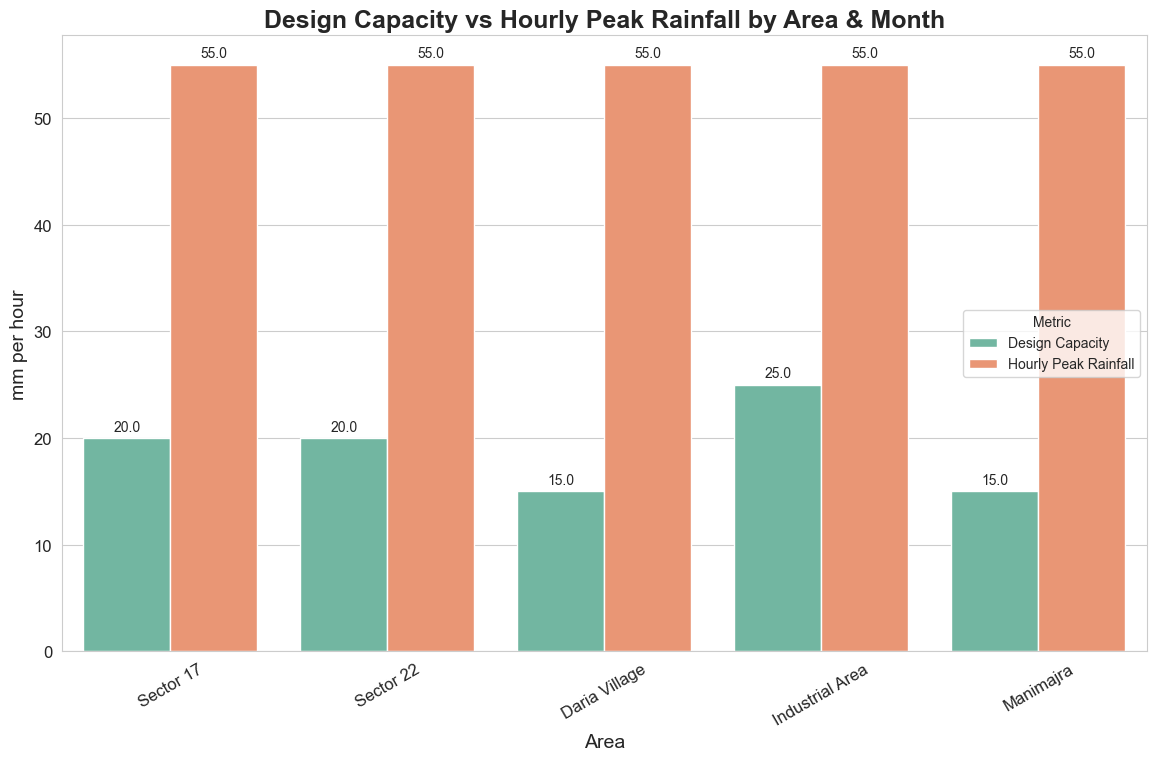

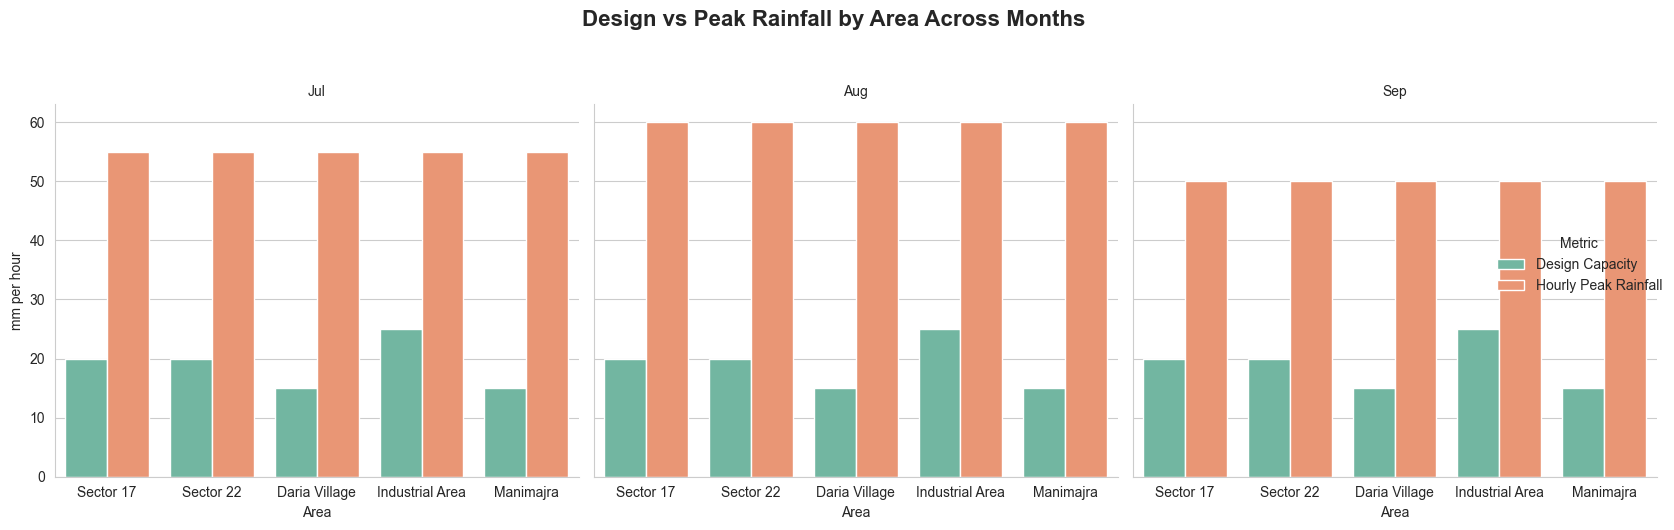

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose drainage_df is your DataFrame with columns:
# ‘area_name’, ‘Year’, ‘Month_Name’, ‘Design_Capacity_mm_per_hr’, ‘Hourly_Peak_mm’

# If needed, ensure Month_Name is ordered properly
month_order = ["Jul", "Aug", "Sep"]  # adapt if you have more months

# Reshape to long format so metrics are comparable
df_long = drainage_df.melt(
    id_vars=["area_name", "Month_Name"],
    value_vars=["Design_Capacity_mm_per_hr", "Hourly_Peak_mm"],
    var_name="Metric",
    value_name="mm_per_hr"
)

# Map metric names to prettier labels
df_long["Metric"] = df_long["Metric"].map({
    "Design_Capacity_mm_per_hr": "Design Capacity",
    "Hourly_Peak_mm": "Hourly Peak Rainfall"
})

# Set style
sns.set_style("whitegrid")
pal = sns.color_palette("Set2")

# Create the bar plot: one cluster per Area‐Month, bars for each Metric
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df_long,
    x="area_name",
    y="mm_per_hr",
    hue="Metric",
    palette=pal,
    ci=None,
    dodge=True
)

# Improve the plot design
ax.set_title("Design Capacity vs Hourly Peak Rainfall by Area & Month", fontsize=18, fontweight="bold")
ax.set_xlabel("Area", fontsize=14)
ax.set_ylabel("mm per hour", fontsize=14)
ax.tick_params(axis="x", rotation=30, labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# To differentiate months, you could facet or annotate
# Option A: facet by Month
g = sns.catplot(
    data=df_long,
    x="area_name",
    y="mm_per_hr",
    hue="Metric",
    col="Month_Name",
    kind="bar",
    palette=pal,
    ci=None,
    height=5,
    aspect=1
)
g.set_titles("{col_name}")
g.set_axis_labels("Area", "mm per hour")
g.fig.suptitle("Design vs Peak Rainfall by Area Across Months", y=1.05, fontsize=16, fontweight="bold")
g._legend.set_title("Metric")

# Option B: annotate bars with month labels or subtle transparency

# Annotate bar heights
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3, fontsize=10)

plt.tight_layout()
plt.show()


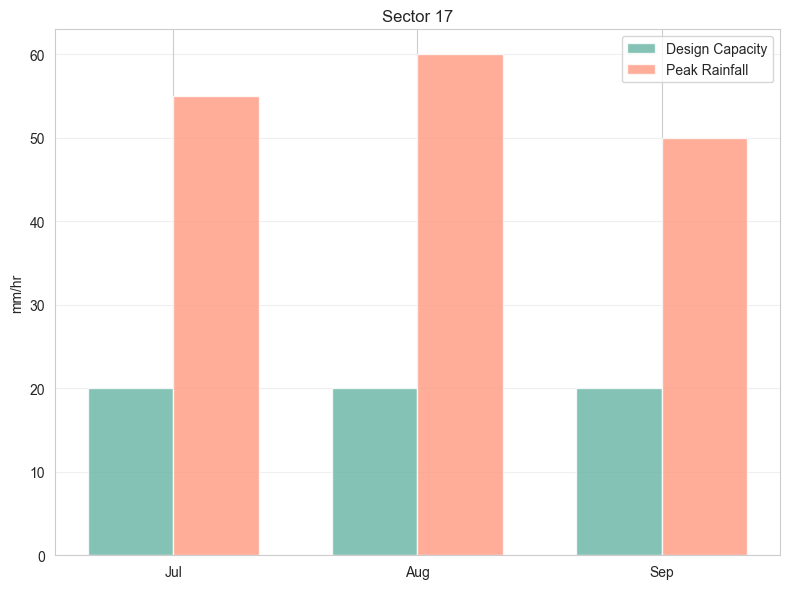

In [35]:
sector17 = drainage_df[drainage_df['area_name'] == 'Sector 17']
plt.figure(figsize=(8, 6))
x = np.arange(len(sector17))
width = 0.35
plt.bar(x - width/2, sector17['Design_Capacity_mm_per_hr'], width, 
        label='Design Capacity', color='#66b3a3', alpha=0.8)
plt.bar(x + width/2, sector17['Hourly_Peak_mm'], width, 
        label='Peak Rainfall', color='#ff9980', alpha=0.8)
plt.title('Sector 17')
plt.xticks(x, sector17['Month_Name'])
plt.ylabel('mm/hr')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

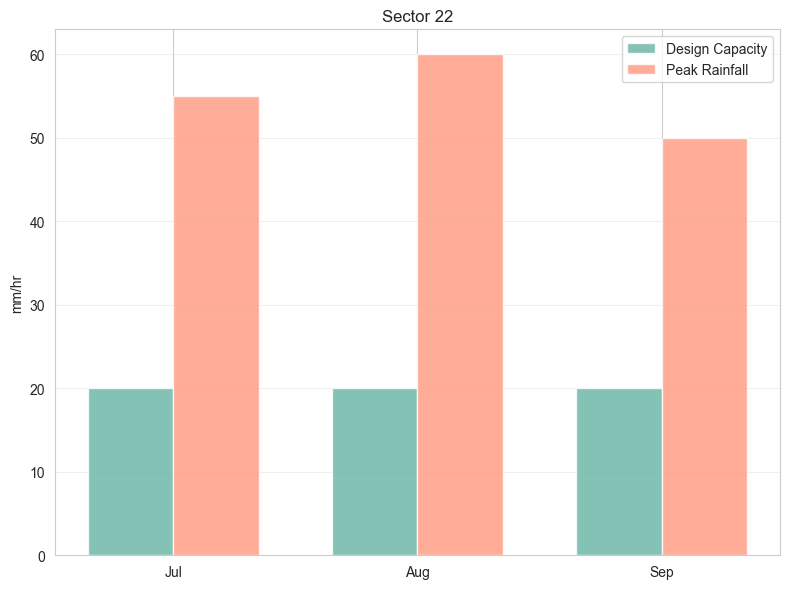

In [36]:
plt.figure(figsize=(8, 6))
sector22 = drainage_df[drainage_df['area_name'] == 'Sector 22']
x = np.arange(len(sector22))
width = 0.35
plt.bar(x - width/2, sector22['Design_Capacity_mm_per_hr'], width, 
        label='Design Capacity', color='#66b3a3', alpha=0.8)
plt.bar(x + width/2, sector22['Hourly_Peak_mm'], width, 
        label='Peak Rainfall', color='#ff9980', alpha=0.8)
plt.title('Sector 22')
plt.xticks(x, sector22['Month_Name'])
plt.ylabel('mm/hr')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

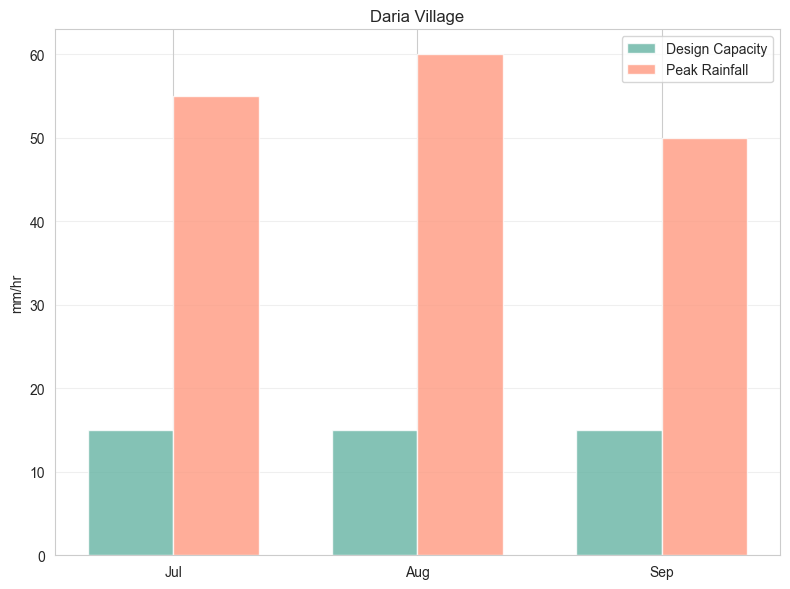

In [38]:
plt.figure(figsize=(8, 6))
daria = drainage_df[drainage_df['area_name'] == 'Daria Village']
x = np.arange(len(daria))
width = 0.35
plt.bar(x - width/2, daria['Design_Capacity_mm_per_hr'], width, 
        label='Design Capacity', color='#66b3a3', alpha=0.8)
plt.bar(x + width/2, daria['Hourly_Peak_mm'], width, 
        label='Peak Rainfall', color='#ff9980', alpha=0.8)
plt.title('Daria Village')
plt.xticks(x, daria['Month_Name'])
plt.ylabel('mm/hr')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

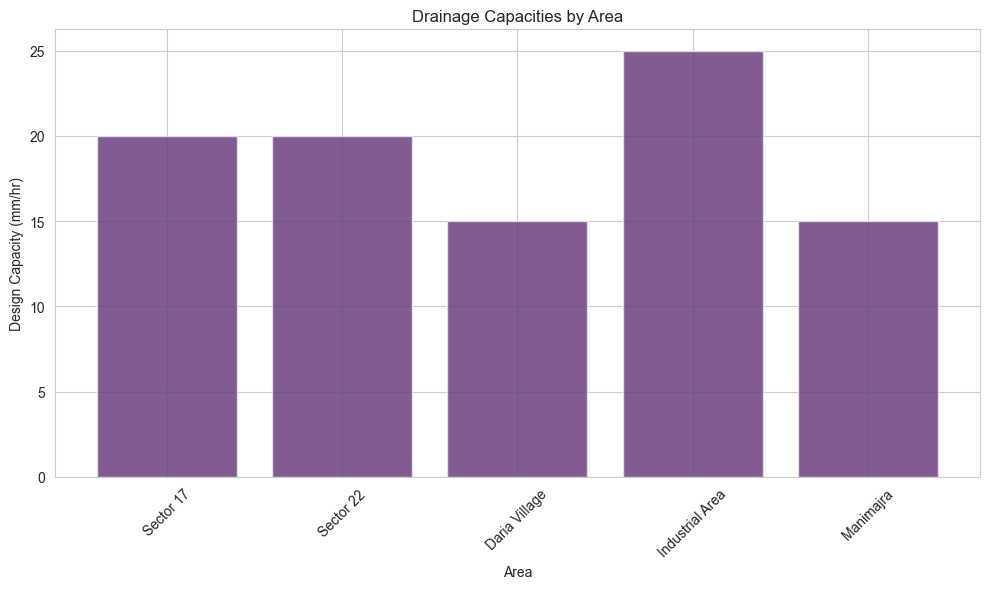

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(drainage_df['area_name'], drainage_df['Design_Capacity_mm_per_hr'], color = '#6F4685', alpha = 0.5)
plt.title('Drainage Capacities by Area')
plt.xlabel('Area')
plt.ylabel('Design Capacity (mm/hr)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()